In [170]:
import datetime as dt
import mplfinance as mpf
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.size'      : 16,
    'axes.grid'      : True,
    'grid.linestyle' : '--',
    'figure.figsize' : [12, 4]
})
import yfinance as yf

[*********************100%%**********************]  1 of 1 completed


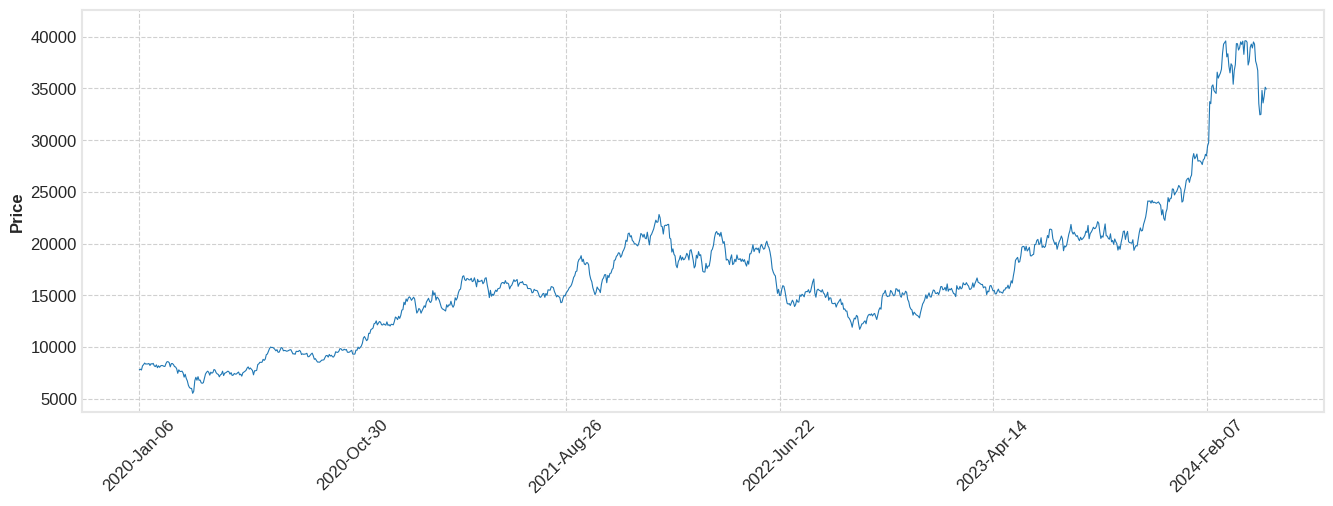

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-06,7868.333496,7895.000000,7776.666504,7785.000000,7040.187988,3440400
2020-01-07,7830.000000,7861.666504,7755.000000,7838.333496,7088.418457,2783700
2020-01-08,7691.666504,7823.333496,7625.000000,7763.333496,7020.593750,4708200
2020-01-09,7918.333496,8170.000000,7918.333496,8161.666504,7380.816406,4565400
2020-01-10,8231.666992,8366.666992,8185.000000,8280.000000,7487.829102,4650600
...,...,...,...,...,...,...
2024-04-24,33590.000000,34810.000000,33340.000000,34810.000000,34810.000000,5081400
2024-04-25,33530.000000,34360.000000,33400.000000,33600.000000,33600.000000,3712900
2024-04-26,34250.000000,34780.000000,33730.000000,34230.000000,34230.000000,4399400


In [199]:
start = dt.date(2020, 1, 1)
end = dt.date(2024, 5, 2)

#ticker = '6920.T' # レーザーテック
#ticker = '7735.T' # スクリーン
ticker = '8035.T' # 東京エレクトロン
df0 = yf.download(ticker, start, end)
mpf.plot(df0, type='line', style='binance', figratio=(12, 4))
df0

In [200]:
df = pd.DataFrame({'ds': df0.index, 'y': df0['Close']}).reset_index(drop=True)
df

,ds,y
0,2020-01-06,7785.000000
1,2020-01-07,7838.333496
2,2020-01-08,7763.333496
3,2020-01-09,8161.666504
4,2020-01-10,8280.000000
...,...,...
1052,2024-04-24,34810.000000
1053,2024-04-25,33600.000000
1054,2024-04-26,34230.000000
1055,2024-04-30,35120.000000


In [201]:
m = Prophet()
m.fit(df)

07:18:45 - cmdstanpy - INFO - Chain [1] start processing
07:18:45 - cmdstanpy - INFO - Chain [1] done processing


In [202]:
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
1142,2024-07-26
1143,2024-07-27
1144,2024-07-28
1145,2024-07-29
1146,2024-07-30


In [203]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14)

,ds,yhat,yhat_lower,yhat_upper
1133,2024-07-17,39661.821213,37568.782326,41500.328201
1134,2024-07-18,39725.845940,37860.766280,41584.423249
1135,2024-07-19,39777.568289,37916.437757,41706.002917
1136,2024-07-20,40421.474986,38433.477868,42173.072055
1137,2024-07-21,40480.003780,38554.591606,42336.042706
1138,2024-07-22,39930.448312,37953.477350,41856.113302
1139,2024-07-23,40009.222198,37980.883156,41869.395933
1140,2024-07-24,40064.652840,38017.856923,41881.927399
1141,2024-07-25,40128.303942,38180.187902,42091.791193
1142,2024-07-26,40176.297078,38332.312340,42072.490152


/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


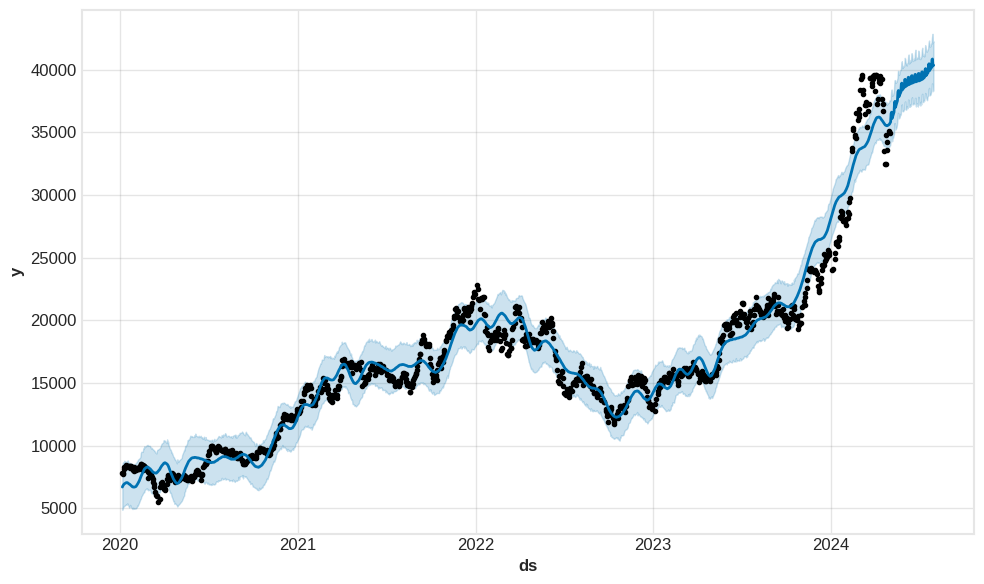

In [204]:
fig1 = m.plot(forecast)

/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Se

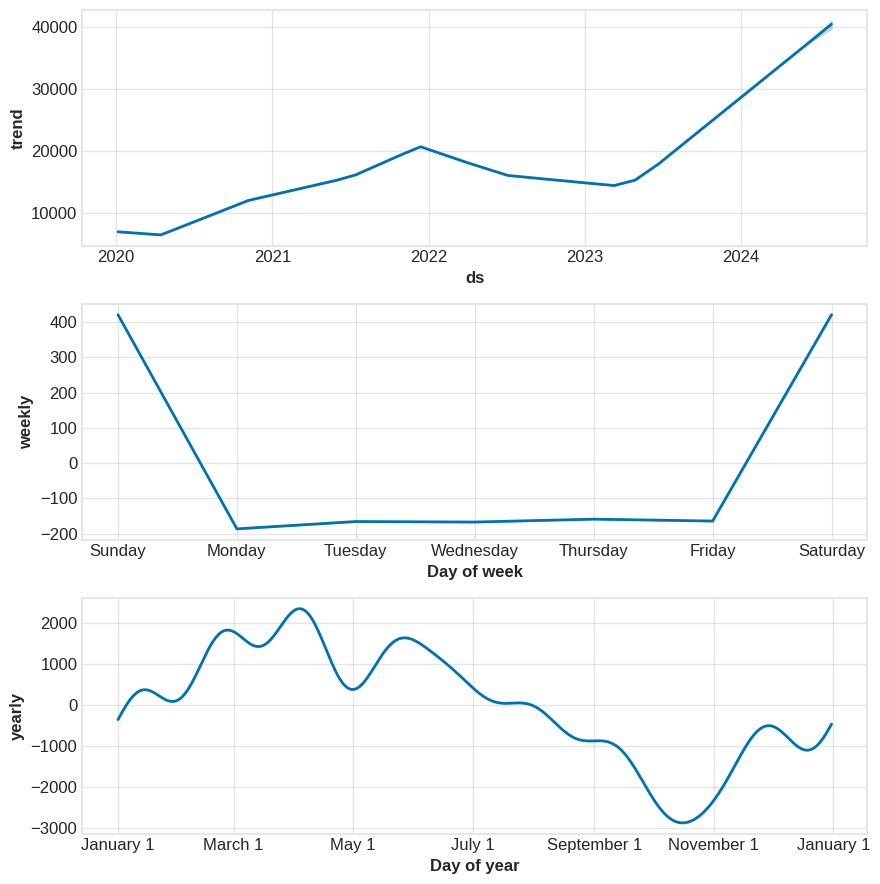

In [206]:
fig2 = m.plot_components(forecast)